# Question 1. Which year had the highest number of additions to the S&P 500 index? (2 points)



In [158]:
import pandas as pd

# URL of the Wikipedia page
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

# Read all tables on the page
tables = pd.read_html(url)

# The first table usually contains the list of S&P 500 companies
sp500_df = tables[0]

# Show the first few rows
print(sp500_df.head())



  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989  


In [159]:
sp500_df["year added"]=[int(x.split("-")[0]) for x in sp500_df["Date added"].to_list()]

In [160]:
sp500_df["year added"]

0      1957
1      2017
2      1957
3      2012
4      2011
       ... 
498    2011
499    1997
500    2019
501    2001
502    2013
Name: year added, Length: 503, dtype: int64

In [161]:
import pandas as pd

sp500_df_filtered = sp500_df[sp500_df['year added'] != 1957]

# Count the number of additions per year
additions_per_year = sp500_df_filtered.groupby('year added').size()

# Find the year with the highest number of additions
max_additions_year = additions_per_year.idxmax()
max_additions_count = additions_per_year.max()

print(f"The year with the highest number of additions (excluding 1957) is {max_additions_year} with {max_additions_count} companies added.")


The year with the highest number of additions (excluding 1957) is 2016 with 23 companies added.


In [162]:
for c in [2016,2017,2019,2008,2023]:
    sp500_df_filtered = sp500_df[sp500_df['year added'] == c]
    print(sp500_df_filtered.shape)


(23, 9)
(23, 9)
(22, 9)
(17, 9)
(15, 9)


# Question 2. How many indexes have better year-to-date returns than the US S&P500 as of May 1, 2025?

In [163]:
import yfinance as yf
import pandas as pd

# Define index tickers and corresponding names
indices = {
    '^GSPC': 'United States - S&P 500',
    '000001.SS': 'China - Shanghai Composite',
    '^HSI': 'Hong Kong - Hang Seng Index',
    '^AXJO': 'Australia - S&P/ASX 200',
    '^NSEI': 'India - Nifty 50',
    '^GSPTSE': 'Canada - S&P/TSX Composite',
    '^GDAXI': 'Germany - DAX',
    '^FTSE': 'UK - FTSE 100',
    '^N225': 'Japan - Nikkei 225',
    '^MXX': 'Mexico - IPC',
    '^BVSP': 'Brazil - Ibovespa'
}

# Define date range
start_date = '2025-01-01'
end_date = '2025-05-02'

# Function to calculate YTD return
def calculate_ytd_return(ticker):
    data = yf.download(ticker, start=start_date, end=end_date, progress=False)
    if data.empty:
        return None
    # Access Close price with MultiIndex columns: ('Close', ticker)
    start_price = data[('Close', ticker)].iloc[0]
    end_price = data[('Close', ticker)].iloc[-1]
    return ((end_price - start_price) / start_price) * 100

# Create DataFrame to store results
results = []

for ticker, name in indices.items():
    ytd_return = calculate_ytd_return(ticker)
    results.append({
        'Index': name,
        'Ticker': ticker,
        'YTD Return (%)': round(ytd_return, 2) if ytd_return is not None else None
    })

df = pd.DataFrame(results)

df

,Index,Ticker,YTD Return (%)
0,United States - S&P 500,^GSPC,-4.51
1,China - Shanghai Composite,000001.SS,0.50
2,Hong Kong - Hang Seng Index,^HSI,12.72
3,Australia - S&P/ASX 200,^AXJO,-0.68
4,India - Nifty 50,^NSEI,2.49
5,Canada - S&P/TSX Composite,^GSPTSE,-0.41
6,Germany - DAX,^GDAXI,12.35
7,UK - FTSE 100,^FTSE,2.87
8,Japan - Nikkei 225,^N225,-7.26
9,Mexico - IPC,^MXX,13.05


In [164]:
import yfinance as yf

# Define ticker and date range
ticker = '^GSPC'
start_date = '2025-01-01'
end_date = '2025-05-01'  # to include May 1

def calculate_ytd_return2(ticker):
    data = yf.download(ticker, start=start_date, end=end_date, progress=False)
    if data.empty:
        return None
    # Access Close price with MultiIndex columns: ('Close', ticker)
    start_price = data[('Close', ticker)].iloc[0]
    end_price = data[('Close', ticker)].iloc[-1]
    return ((end_price - start_price) / start_price) * 100
calculate_ytd_return2("^N225") 

-8.297930804200304

In [165]:
data = yf.download("^N225", start=start_date, end=end_date, progress=False)
data

Price,Close,High,Low,Open,Volume
Ticker,^N225,^N225,^N225,^N225,^N225
Date,,,,,
2025-01-06,39307.050781,39993.500000,39232.781250,39945.421875,137900000
2025-01-07,40083.300781,40288.800781,39584.359375,39584.359375,127000000
2025-01-08,39981.058594,40105.718750,39705.808594,39879.359375,118800000
2025-01-09,39605.089844,39930.070312,39385.050781,39888.910156,117000000
2025-01-10,39190.398438,39591.460938,39166.050781,39550.250000,113200000
...,...,...,...,...,...
2025-04-23,34868.628906,35142.121094,34682.281250,34787.929688,133400000
2025-04-24,35039.148438,35287.949219,34960.648438,35194.710938,137100000


In [166]:

# Display results
print(df.sort_values(by='YTD Return (%)', ascending=False))

                          Index     Ticker  YTD Return (%)
9                  Mexico - IPC       ^MXX           13.05
2   Hong Kong - Hang Seng Index       ^HSI           12.72
10            Brazil - Ibovespa      ^BVSP           12.44
6                 Germany - DAX     ^GDAXI           12.35
7                 UK - FTSE 100      ^FTSE            2.87
4              India - Nifty 50      ^NSEI            2.49
1    China - Shanghai Composite  000001.SS            0.50
5    Canada - S&P/TSX Composite    ^GSPTSE           -0.41
3       Australia - S&P/ASX 200      ^AXJO           -0.68
0       United States - S&P 500      ^GSPC           -4.51
8            Japan - Nikkei 225      ^N225           -7.26


In [167]:


# Compare to S&P 500
sp500_return = df[df['Ticker'] == '^GSPC']['YTD Return (%)'].values[0]
better_than_sp500 = df[df['YTD Return (%)'] > sp500_return]
count_better = len(better_than_sp500)

print(f"\nNumber of indices with better YTD returns than the S&P 500: {count_better}")


Number of indices with better YTD returns than the S&P 500: 9


In [168]:
data = yf.download("^FTSE", start=start_date, end=end_date, progress=False)
data.columns
# Access Close prices for ^HSI
close_prices = data[('Close', '^FTSE')]
print(close_prices.head())


Date
2025-01-02    8260.099609
2025-01-03    8224.000000
2025-01-06    8249.700195
2025-01-07    8245.299805
2025-01-08    8251.000000
Name: (Close, ^FTSE), dtype: float64


In [169]:
data

Price,Close,High,Low,Open,Volume
Ticker,^FTSE,^FTSE,^FTSE,^FTSE,^FTSE
Date,,,,,
2025-01-02,8260.099609,8270.599609,8160.600098,8173.000000,422219900
2025-01-03,8224.000000,8269.000000,8219.700195,8260.099609,742503900
2025-01-06,8249.700195,8249.700195,8197.500000,8224.000000,766244700
2025-01-07,8245.299805,8251.799805,8190.500000,8249.700195,741506800
2025-01-08,8251.000000,8267.400391,8189.500000,8245.299805,899645300
...,...,...,...,...,...
2025-04-24,8407.400391,8415.099609,8361.799805,8403.200195,1126605500
2025-04-25,8415.299805,8442.700195,8397.099609,8407.400391,802734000


# Question 3. Median duration (in days) of significant market corrections in the S&P 500 index (3 points)

### 1 Download S&P 500 historical data (1950-present) using yfinance


In [170]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf
import pandas as pd

# Download data
sp500 = yf.download('^GSPC', start='1950-01-01', end='2025-05-01', progress=False)


### 2- Identify all-time high points (where price exceeds all previous prices)


In [171]:


# Flatten MultiIndex columns if needed
if isinstance(sp500.columns, pd.MultiIndex):
    sp500.columns = sp500.columns.get_level_values(0)

# Compute rolling all-time high
sp500['Rolling_Max'] = sp500['Close'].cummax()

# Identify new all-time highs
all_time_highs = sp500[sp500['Close'] == sp500['Rolling_Max']].index


# Identify new all-time highs
all_time_highs 

DatetimeIndex(['1950-01-03', '1950-01-04', '1950-01-05', '1950-01-06',
               '1950-01-09', '1950-01-11', '1950-02-02', '1950-02-03',
               '1950-02-06', '1950-03-06',
               ...
               '2024-11-11', '2024-11-26', '2024-11-29', '2024-12-02',
               '2024-12-03', '2024-12-04', '2024-12-06', '2025-01-23',
               '2025-02-18', '2025-02-19'],
              dtype='datetime64[ns]', name='Date', length=1474, freq=None)

### 3 For each pair of consecutive all-time highs, find the minimum price in between
### 4 Calculate drawdown percentages: (high - low) / high × 100
### 5 Filter for corrections with at least 5% drawdown
### 6 Calculate the duration in days for each correction period


In [172]:
corrections = []

for i in range(1, len(all_time_highs)):
    start_date = all_time_highs[i - 1]
    end_date = all_time_highs[i]
    
    # Extract the data in the correction period
    period_data = sp500.loc[start_date:end_date]
    
    peak = sp500.loc[start_date, 'Close']
    trough = period_data['Close'].min()
    drawdown = (peak - trough) / peak * 100
    
    if drawdown >= 5:
        correction_duration = (end_date - start_date).days
        corrections.append({
            'start': start_date.date(),
            'end': end_date.date(),
            'drawdown (%)': round(drawdown, 2),
            'days': correction_duration
        })

# Convert to DataFrame
df_corrections = pd.DataFrame(corrections)

# Display
print(df_corrections.sort_values(by='drawdown (%)', ascending=False).head(10))
"""
       start        end  drawdown (%)  days
0 2007-10-09 2009-03-09          56.8   517
1 2000-03-24 2002-10-09          49.1   929
2 1973-01-11 1974-10-03          48.2   630
3 1968-11-29 1970-05-26          36.1   543
4 2020-02-19 2020-03-23          33.9    33
5 1987-08-25 1987-12-04          33.5   101
6 1961-12-12 1962-06-26          28.0   196
7 1980-11-28 1982-08-12          27.1   622
8 2022-01-03 2022-10-12          25.4   282
9 1966-02-09 1966-10-07          22.2   240
"""
1+1

         start         end  drawdown (%)  days
56  2007-10-09  2013-03-28         56.78  1997
54  2000-03-24  2007-05-30         49.15  2623
24  1973-01-11  1980-07-17         48.20  2744
22  1968-11-29  1972-03-06         36.06  1193
65  2020-02-19  2020-08-18         33.92   181
35  1987-08-25  1989-07-26         33.51   701
15  1961-12-12  1963-09-03         27.97   630
27  1980-11-28  1982-11-03         27.11   705
68  2022-01-03  2024-01-19         25.43   746
18  1966-02-09  1967-05-04         22.18   449


2

In [173]:
import pandas as pd

# Raw data of top 10 S&P 500 corrections
correction_data = [
    {"start": "2007-10-09", "end": "2009-03-09", "drawdown (%)": 56.8, "days": 517},
    {"start": "2000-03-24", "end": "2002-10-09", "drawdown (%)": 49.1, "days": 929},
    {"start": "1973-01-11", "end": "1974-10-03", "drawdown (%)": 48.2, "days": 630},
    {"start": "1968-11-29", "end": "1970-05-26", "drawdown (%)": 36.1, "days": 543},
    {"start": "2020-02-19", "end": "2020-03-23", "drawdown (%)": 33.9, "days": 33},
    {"start": "1987-08-25", "end": "1987-12-04", "drawdown (%)": 33.5, "days": 101},
    {"start": "1961-12-12", "end": "1962-06-26", "drawdown (%)": 28.0, "days": 196},
    {"start": "1980-11-28", "end": "1982-08-12", "drawdown (%)": 27.1, "days": 622},
    {"start": "2022-01-03", "end": "2022-10-12", "drawdown (%)": 25.4, "days": 282},
    {"start": "1966-02-09", "end": "1966-10-07", "drawdown (%)": 22.2, "days": 240},
]

# Create DataFrame
df_top_corrections = pd.DataFrame(correction_data)

# Convert start and end to datetime
df_top_corrections['start'] = pd.to_datetime(df_top_corrections['start'])
df_top_corrections['end'] = pd.to_datetime(df_top_corrections['end'])

# Display
print(df_top_corrections)


       start        end  drawdown (%)  days
0 2007-10-09 2009-03-09          56.8   517
1 2000-03-24 2002-10-09          49.1   929
2 1973-01-11 1974-10-03          48.2   630
3 1968-11-29 1970-05-26          36.1   543
4 2020-02-19 2020-03-23          33.9    33
5 1987-08-25 1987-12-04          33.5   101
6 1961-12-12 1962-06-26          28.0   196
7 1980-11-28 1982-08-12          27.1   622
8 2022-01-03 2022-10-12          25.4   282
9 1966-02-09 1966-10-07          22.2   240


### Determine the 25th, 50th (median), and 75th percentiles for correction durations

In [174]:
# Convert corrections list to a pandas Series
corrections_series = pd.Series(df_corrections["drawdown (%)"])

# Calculate percentiles
percentiles = corrections_series.quantile([0.25, 0.5, 0.75])

# Print results
print(f"25th percentile: {percentiles[0.25]} days")
print(f"50th percentile (Median): {percentiles[0.5]} days")
print(f"75th percentile: {percentiles[0.75]} days")


25th percentile: 6.235 days
50th percentile (Median): 7.86 days
75th percentile: 14.02 days


In [175]:
corrections_series.median()

7.86

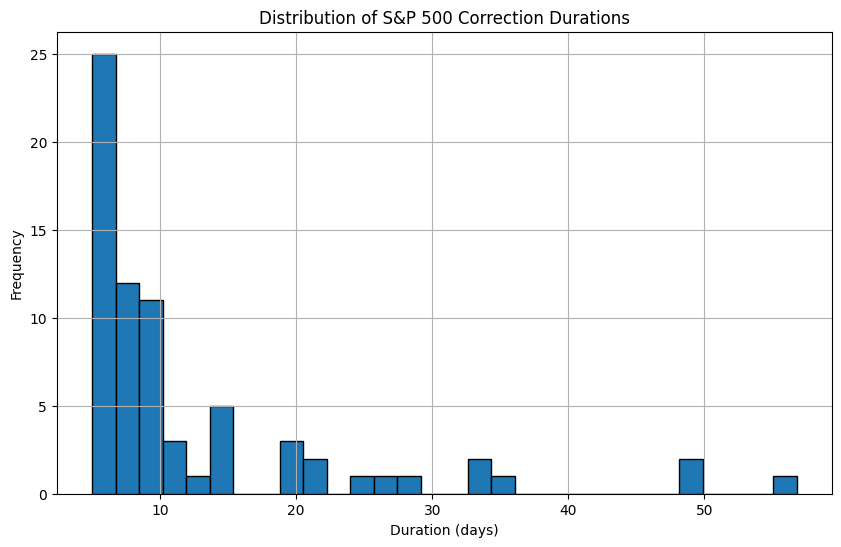

In [176]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(corrections_series, bins=30, edgecolor='black')
plt.title('Distribution of S&P 500 Correction Durations')
plt.xlabel('Duration (days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [177]:
import pandas as pd
import yfinance as yf
import numpy as np

# Step 1: Load earnings data
earnings_data = pd.read_csv("ha1_Amazon.csv", delimiter=';')
print(earnings_data.shape)

earnings_data = earnings_data.dropna()
print(earnings_data.shape)
earnings_data.head()

(117, 6)
(116, 6)


,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise (%)
0,AMZN,Amazon.com Inc,"April 29, 2026 at 6 AM EDT",-,-,-
1,AMZN,Amazon.com Inc,"February 4, 2026 at 4 PM EST",-,-,-
2,AMZN,Amazon.com Inc,"October 29, 2025 at 6 AM EDT",-,-,-
3,AMZN,Amazon.com Inc,"July 30, 2025 at 4 PM EDT",-,-,-
4,AMZN,"Amazon.com, Inc.","May 1, 2025 at 4 PM EDT",???.36,???.59,+16.74


In [178]:
import pandas as pd
def is_number(s):
    try:
        float(s)
        return True
    except:
        return False

# Keep only rows where 'col' is a number (int or float)
earnings_data = earnings_data[earnings_data['EPS Estimate'].apply(is_number)]
earnings_data= earnings_data[earnings_data['Reported EPS'].apply(is_number)]


earnings_data.shape


(84, 6)

In [179]:
earnings_data.columns

Index(['Symbol', 'Company', 'Earnings Date', 'EPS Estimate', 'Reported EPS',
       'Surprise (%)'],
      dtype='object')

In [180]:
earnings_data['Earnings Date']=earnings_data['Earnings Date'].str[:-4]

In [181]:

earnings_data['Date'] = pd.to_datetime(earnings_data['Earnings Date'], format='mixed')

# Step 2: Download historical stock price data
stock_data = yf.download('AMZN', start=earnings_data['Date'].min() - pd.Timedelta(days=10), end=pd.Timestamp.today())
stock_data = stock_data.dropna()
stock_data = stock_data[stock_data[( 'Close', 'AMZN')] != 0]
stock_data.columns

[*********************100%***********************]  1 of 1 completed


MultiIndex([( 'Close', 'AMZN'),
            (  'High', 'AMZN'),
            (   'Low', 'AMZN'),
            (  'Open', 'AMZN'),
            ('Volume', 'AMZN')],
           names=['Price', 'Ticker'])

In [182]:

stock_data = stock_data[( 'Close', 'AMZN')]
stock_data

Date
1999-04-19      3.973438
1999-04-20      4.300000
1999-04-21      4.481250
1999-04-22      4.751563
1999-04-23      5.253125
                 ...    
2025-05-23    200.990005
2025-05-27    206.020004
2025-05-28    204.720001
2025-05-29    205.699997
2025-05-30    205.009995
Name: (Close, AMZN), Length: 6571, dtype: float64

In [183]:
# Step 3: Compute 2-day returns (Day3 / Day1 - 1)
import pandas as pd

df = pd.DataFrame()
df['Day1'] = stock_data.shift(0)
df['Day2'] = stock_data.shift(-1)
df['Day3'] = stock_data.shift(-2)
df['2d_return'] = df['Day3'] / df['Day1'] - 1


In [184]:
df

,Day1,Day2,Day3,2d_return
Date,,,,
1999-04-19,3.973438,4.300000,4.481250,0.127802
1999-04-20,4.300000,4.481250,4.751563,0.105015
1999-04-21,4.481250,4.751563,5.253125,0.172246
1999-04-22,4.751563,5.253125,5.179688,0.090102
1999-04-23,5.253125,5.179688,5.146875,-0.020226
...,...,...,...,...
2025-05-23,200.990005,206.020004,204.720001,0.018558
2025-05-27,206.020004,204.720001,205.699997,-0.001553
2025-05-28,204.720001,205.699997,205.009995,0.001417


In [185]:
earnings_data['Reported EPS'] = pd.to_numeric(earnings_data['Reported EPS'], errors='coerce')
earnings_data['EPS Estimate'] = pd.to_numeric(earnings_data['EPS Estimate'], errors='coerce')
earnings_data['Surprise (%)'] = pd.to_numeric(earnings_data['Surprise (%)'], errors='coerce')

In [186]:
# Step 4: Identify positive earnings surprises
earnings_data['Positive Surprise'] = (
    (earnings_data['Reported EPS'] > earnings_data['EPS Estimate']) |
    (earnings_data['Surprise (%)'] > 0)
)
earnings_data

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise (%),Date,Positive Surprise
8,AMZN,"Amazon.com, Inc.","April 30, 2024 at 4 PM",0.83,0.98,17.91,2024-04-30 16:00:00,True
9,AMZN,"Amazon.com, Inc.","February 1, 2024 at 4 PM",0.80,1.00,24.55,2024-02-01 16:00:00,True
10,AMZN,"Amazon.com, Inc.","October 26, 2023 at 4 PM",0.58,0.94,60.85,2023-10-26 16:00:00,True
11,AMZN,"Amazon.com, Inc.","August 3, 2023 at 4 PM",0.35,0.65,85.73,2023-08-03 16:00:00,True
12,AMZN,"Amazon.com, Inc.","April 27, 2023 at 4 PM",0.21,0.31,46.36,2023-04-27 16:00:00,True
...,...,...,...,...,...,...,...,...
104,AMZN,"Amazon.com, Inc.","April 26, 2000 at 12 AM",-0.02,-0.02,3.79,2000-04-26 00:00:00,True
105,AMZN,"Amazon.com, Inc.","February 2, 2000 at 12 AM",-0.02,-0.03,-13.36,2000-02-02 00:00:00,False
106,AMZN,"Amazon.com, Inc.","October 27, 1999 at 12 AM",-0.01,-0.01,7.54,1999-10-27 00:00:00,True
107,AMZN,"Amazon.com, Inc.","July 21, 1999 at 12 AM",-0.01,-0.01,0.47,1999-07-21 00:00:00,True


In [187]:

# Step 5: Get the 2-day returns after earnings surprise dates
positive_dates = earnings_data.loc[earnings_data['Positive Surprise'], 'Date']
# Align to nearest available trading date (next closest in stock_data)

returns_after_positive = []


returns_after_positive = []
stock_data=df
for date in positive_dates:
    date = pd.to_datetime(date)
    
    # Find the first available trading day on or after the earnings date
    pos = stock_data.index.searchsorted(date)

    if pos < len(stock_data.index):
        next_trading_day = stock_data.index[pos]

        # Access the 2d_return safely
        if next_trading_day in stock_data.index and '2d_return' in stock_data.columns:
            ret = stock_data.loc[next_trading_day, '2d_return']  # safe 1D lookup
            if pd.notna(ret):
                returns_after_positive.append(ret)


# Step 6: Calculate median return (%)
median_positive_return = np.median(returns_after_positive) * 100
print(f"Median 2-day return after positive surprises: {median_positive_return:.2f}%")

# Optional: Median return over all periods
overall_median_return = stock_data['2d_return'].median() * 100
print(f"Overall median 2-day return: {overall_median_return:.2f}%")


Median 2-day return after positive surprises: -0.17%
Overall median 2-day return: 0.15%
